# PID Controller Implementation

## Introduction

In this notebook, you will implement a PID controller to regulate the speed of a vehicle. The goal is to maintain the desired speed by adjusting the throttle based on the current speed error. This exercise will help you understand control systems and practice your programming skills.

## Task Overview

You need to complete the PID control logic in the `PIDController` class and tune the PID parameters to minimize the Mean Squared Error (MSE) between the actual and target speeds.

### Driving Scenario: 
The vehicle starts its journey from rest, gradually accelerating for 30 seconds. It maintains a constant speed for a short period before slightly decelerating and continuing at a new constant speed. At around 80 seconds, the vehicle decelerates sharply, followed by cruising at a lower speed. Another sharp deceleration occurs, bringing the speed close to zero, followed by a slight acceleration to a steady pace for the remainder of the journey.

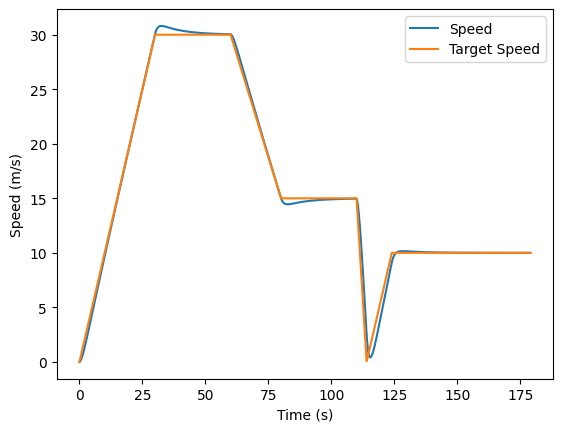

## PID Controller Implementation

Fill in the missing parts in the `PIDController` class to complete the implementation of the PID control logic.

In [11]:
# Define the PID controller class
class PIDController:
    def __init__(self, kp, ki, kd):
        """
        Initialize the PID controller with the given gains.
        
        Parameters:
        kp (float): Proportional gain
        ki (float): Integral gain
        kd (float): Derivative gain
        """
        pass

    def control(self, target_speed, current_speed, dt):
        """
        Implement the PID controller based on target and current speeds.
        
        Parameters:
        target_speed (float): The desired speed.
        current_speed (float): The actual current speed.
        dt (float): The sampling time.

        Returns:
        float: Output of the PID controller [+ve: Throttle, -ve: Brake].
        """
        pass

## Simulation and Visualization

Run the simulation using the PID controller and visualize the results. You need to complete the simulation code to ensure it correctly uses your PID controller.

Mean Squared Error: 489.23772608715507


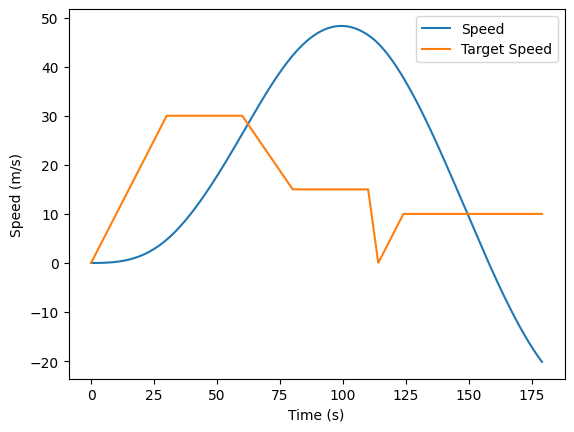

In [12]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from controller import PIDController

def read_waypoints(file_path):
    times = []
    speeds = []
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header
        for row in reader:
            speeds.append(float(row[0]))
            times.append(float(row[1]))
    return times, speeds

def simulate(times, speeds, pid_controller, dt, total_time, initial_speed=0):
    time_steps = int(total_time / dt)
    sim_times = np.linspace(0, total_time, time_steps)
    sim_speeds = np.zeros(time_steps)
    current_speed = initial_speed

    for i in range(1, time_steps):
        target_speed = np.interp(sim_times[i], times, speeds)
        control_signal = pid_controller.control(target_speed, current_speed, dt)
        current_speed += control_signal * dt
        sim_speeds[i] = current_speed

    return sim_times, sim_speeds

def grade_performance(actual_speeds, target_speeds):
    error = np.array(actual_speeds) - np.array(target_speeds)
    mse = np.mean(np.square(error))
    return mse

def main():
    times, speeds = read_waypoints('waypoints.csv')
    
    dt = 0.1
    total_time = 179
    initial_speed = 0


    #######################################################################################################
    ######################### Apply your tuned parameters to the controller class #########################
    #######################################################################################################
    kp=0.001                                                             
    ki=0.001
    kd=0.001
    pid_controller = PIDController(___)                                 
    #######################################################################################################
    #######################################################################################################

    
    sim_times, sim_speeds = simulate(times, speeds, pid_controller, dt, total_time, initial_speed)
    
    target_speeds = np.interp(sim_times, times, speeds)
    mse = grade_performance(sim_speeds, target_speeds)
    print(f'Mean Squared Error: {mse}')
    
    plt.plot(sim_times, sim_speeds, label='Speed')
    plt.plot(sim_times, target_speeds, label='Target Speed')
    plt.xlabel('Time (s)')
    plt.ylabel('Speed (m/s)')
    plt.legend()
    plt.show()

if __name__ == '__main__':
    main()